<a href="https://colab.research.google.com/github/BileOara/REGRESSION/blob/master/Pred_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.size'] = 20
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/Train.csv')
dffd = pd.read_csv('/Test.csv')

In [77]:
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [78]:
dffd.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [79]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [81]:
dffd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [0]:
df['Personal or Business']=df['Personal or Business'].replace({'Personal': 0, 'Business':1})
dffd['Personal or Business']=dffd['Personal or Business'].replace({'Personal': 0, 'Business':1})


In [0]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [85]:
missing_values_table(df)

Your selected dataframe has 29 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation in millimeters,20649,97.4
Temperature,4366,20.6


In [84]:
missing_values_table(dffd)

Your selected dataframe has 25 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation in millimeters,6869,97.2
Temperature,1437,20.3


In [86]:
# handling missing data for training data
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 29 columns.
There are 2 columns that have missing values.
We will remove 1 columns.


In [87]:
# handling missing data for test data
missing_dffd = missing_values_table(dffd);
missing_columns_dffd = list(missing_dffd[missing_dffd['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 25 columns.
There are 2 columns that have missing values.
We will remove 1 columns.


In [88]:
# Drop the columns in training data
df1 = df.drop(['Precipitation in millimeters'],axis='columns')
df1.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')

In [89]:
# Drop the columns in test data
df2 = dffd.drop(['Precipitation in millimeters'],axis='columns')
df2.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id'],
      dtype='object')

### Dealing with the Response Variable

In [95]:
# response variable
df1['Time from Pickup to Arrival'].describe()


count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

In [96]:
df1['Time from Pickup to Arrival'].dropna().sort_values().tail(10)

8436     6991
16696    7035
3758     7100
2293     7143
3297     7277
5329     7387
12937    7491
9626     7646
16384    7714
1028     7883
Name: Time from Pickup to Arrival, dtype: int64

In [0]:
# Calculate first and third quartile
first_quartile = df1['Time from Pickup to Arrival'].describe()['25%']
third_quartile = df1['Time from Pickup to Arrival'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df1[(df1['Time from Pickup to Arrival'] > (first_quartile - 3 * iqr)) &
            (df['Time from Pickup to Arrival'] < (third_quartile + 3 * iqr))]

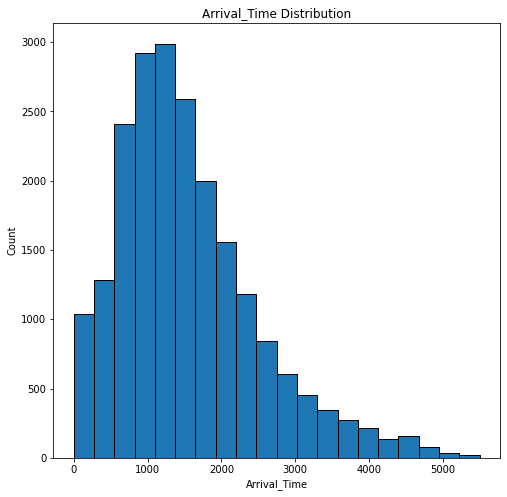

In [98]:
figsize(8, 8)
plt.hist(df['Time from Pickup to Arrival'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Arrival_Time'); 
plt.ylabel('Count'); plt.title('Arrival_Time Distribution');

In [0]:
types = df.dropna(subset=['Time from Pickup to Arrival'])
types = types['Personal or Business'].value_counts()
types = list(types[types.values > 100].index)

In [100]:
# Find all correlations and sort 
correlations_data = df.corr()['Time from Pickup to Arrival'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Destination Lat                             -0.067739
Pickup Lat                                  -0.055063
Placement - Day of Month                    -0.015663
Confirmation - Day of Month                 -0.015654
Arrival at Pickup - Day of Month            -0.015654
Pickup - Day of Month                       -0.015654
Arrival at Destination - Day of Month       -0.015654
Personal or Business                        -0.015625
Platform Type                               -0.006502
Temperature                                  0.005180
Placement - Weekday (Mo = 1)                 0.012196
Pickup - Weekday (Mo = 1)                    0.012251
Arrival at Pickup - Weekday (Mo = 1)         0.012251
Confirmation - Weekday (Mo = 1)              0.012251
Arrival at Destination - Weekday (Mo = 1)    0.012251
Name: Time from Pickup to Arrival, dtype: float64 

Arrival at Pickup - Day of Month            -0.015654
Pickup - Day of Month                       -0.015654
Arrival at Destination - Day o

## Data Processing Part 1

In [0]:
# select numeric subset of data
numeric_subset_train = df.select_dtypes('number')
numeric_subset_test = dffd.select_dtypes('number')

# Select the categorical subset of data
categorical_subset_train = df[['Rider Id', 'Personal or Business']]
categorical_subset_test = dffd[['Rider Id', 'Personal or Business']]

# One hot encode categorical subset of data
categorical_subset_train = pd.get_dummies(categorical_subset_train)
categorical_subset_test = pd.get_dummies(categorical_subset_test)

# combine encoded categorical subset numeric subset of data
features_train = pd.concat([numeric_subset_train, categorical_subset_train], axis = 1)
features_test = pd.concat([numeric_subset_test, categorical_subset_test], axis = 1)

# Drop deliveries without a time from pickup to arrival, response
features_train = features_train.dropna(subset = ['Time from Pickup to Arrival'])

# Find correlations with the score 
correlations = features_train.corr()['Time from Pickup to Arrival'].dropna().sort_values()

In [0]:
# figsize(12, 10)

# # Extract the building types
# features['Personal or Business'] = df.dropna(subset = ['Time from Pickup to Arrival'])['Personal or Business']

# # Limit to building types with more than 100 observations (from previous code)
# features = features[features['Personal or Business'].isin(types)]

# # Use seaborn to plot a scatterplot of Score vs Log Source EUI
# sns.lmplot('Distance (KM)', 'Time from Pickup to Arrival', 
#           hue = 'Personal or Business', data = features,
#           scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = True,
#           size = 12, aspect = 1.2);

# # Plot labeling
# plt.xlabel("Distance (KM)", size = 28)
# plt.ylabel('Arrival Time', size = 28)
# plt.title('Distance vs Arrival time', size = 36);

In [0]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Time from Pickup to Arrival']
    x = x.drop(columns = ['Time from Pickup to Arrival'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Pickup Lat', 'Pickup Long','Arrival at Destination - Weekday (Mo = 1)', 'Vehicle Type', 
                          'Arrival at Destination - Day of Month', 'Destination Lat', 'Destination Long'])
    
    # Add the score back in to the data
    x['Time from Pickup to Arrival'] = y
               
    return x

In [106]:
# Remove any columns with all na values
features_train  = features_train.dropna(axis=1, how = 'all')
features_test  = features_test.dropna(axis=1, how = 'all')

print(f'training set shape: {features_train.shape}')
print(f'test set shape: {features_test.shape}')

training set shape: (21141, 944)
test set shape: (7068, 840)


In [107]:
# checking for number of missing values
features_train['Time from Pickup to Arrival'].isna().sum()

0

In [34]:
# # Extract the buildings with no score and the buildings with a score
# no_score = features[features['Time from Pickup to Arrival'].isna()]
# score = features[features['Time from Pickup to Arrival'].notnull()]

# print(no_score.shape)
# print(score.shape)

(0, 944)
(21141, 944)


In [35]:
targets = pd.DataFrame(score['Time from Pickup to Arrival'])
features = score.drop(columns='Time from Pickup to Arrival')


# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(14798, 943)
(6343, 943)
(14798, 1)
(6343, 1)


In [0]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [37]:
df1 = df.drop(['Pickup Lat', 'Pickup Long','Arrival at Destination - Weekday (Mo = 1)', 'Vehicle Type', 'Arrival at Destination - Day of Month', 'Destination Lat', 'Destination Long'], axis='columns')
df1.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')

In [44]:
from seaborn import pairplot
g = pairplot(df1.drop('Time from Pickup to Arrival', axis='columns'))
g.fig.set_size_inches(15,15)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb08f2b10d0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fb08efdc598> (for post_execute):


KeyboardInterrupt: ignored

## Data Processing Part 2

In [0]:
X = df1[['Distance (KM)', 'Temperature', 'Pickup - Day of Month', 
             'Confirmation - Weekday (Mo = 1)', 'Platform Type']].values

y = df1['Time from Pickup to Arrival'].values

X_submission = df2[['Distance (KM)', 'Temperature', 'Pickup - Day of Month', 
             'Confirmation - Weekday (Mo = 1)', 'Platform Type']].values

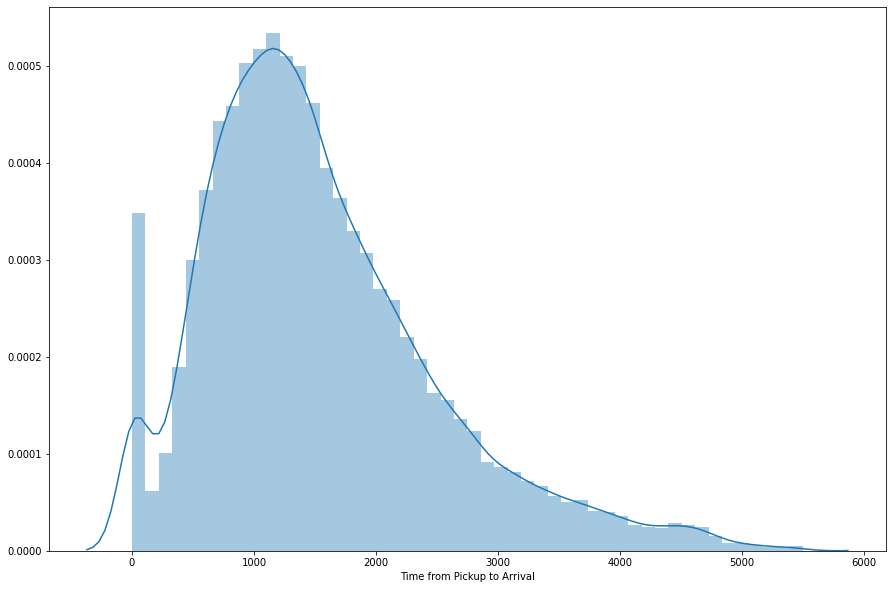

In [47]:
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df1['Time from Pickup to Arrival'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# params = {'n_estimators': 500,
#           'max_depth': 4,
#           'min_samples_split': 5,
#           'learning_rate': 0.1,
#           'loss': 'ls'}

### Impute Missing Data

In [148]:
from sklearn.impute import SimpleImputer
# instantiate an imputer object with a median filling strategy
imputer = SimpleImputer(missing_values = np.nan, strategy='median')

# apply filling
imputer.fit(X)

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
X_submission = imputer.transform(X_submission)
print (X_train,'\n')
print (X_test,'\n')
print (X_submission)

[[ 7.  24.  29.   2.   1. ]
 [ 7.  18.7  1.   6.   1. ]
 [20.  18.2  5.   3.   3. ]
 ...
 [10.  23.9 23.   5.   3. ]
 [14.  23.5 29.   5.   3. ]
 [ 4.  23.5 23.   6.   1. ]] 

[[15.  28.6  1.   5.   3. ]
 [ 4.  13.9 21.   6.   2. ]
 [10.  23.5 17.   5.   3. ]
 ...
 [ 8.  23.5  8.   3.   3. ]
 [ 8.  23.5 27.   6.   3. ]
 [ 9.  19.1 14.   4.   3. ]] 

[[ 8.  23.5 27.   3.   3. ]
 [ 5.  23.5 17.   5.   3. ]
 [ 5.  22.8 27.   4.   3. ]
 ...
 [10.  25.1  5.   3.   3. ]
 [18.  23.6 29.   2.   3. ]
 [ 8.  22.3  4.   2.   3. ]]


### Data Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# instantiate scaler object
scaler = StandardScaler()

# calibrate scaler object to train dataset
scaler.fit(X_train)

# apply scaling to train data
X_train = scaler.transform(X_train)

# apply scaling to test data
X_test = scaler.transform(X_test)

# apply scaling to submissin data
X_submission = scaler.transform(X_submission)

In [150]:
# show scaled data
print (X_train,'\n')
print (X_test,'\n')
print (X_submission)

[[-0.43724661  0.21411228  1.52312164 -0.79722006 -2.80890774]
 [-0.43724661 -1.42646673 -1.66586309  1.74884006 -2.80890774]
 [ 1.85656066 -1.58123834 -1.21029384 -0.16070503  0.39501151]
 ...
 [ 0.09209353  0.18315796  0.83976777  1.11232503  0.39501151]
 [ 0.79788038  0.05934067  1.52312164  1.11232503  0.39501151]
 [-0.96658674  0.05934067  0.83976777  1.74884006 -2.80890774]] 

[[ 0.97432709  1.63801105 -1.66586309  1.11232503  0.39501151]
 [-0.96658674 -2.91227414  0.61198315  1.74884006 -1.20694812]
 [ 0.09209353  0.05934067  0.1564139   1.11232503  0.39501151]
 ...
 [-0.26079989  0.05934067 -0.86861691 -0.16070503  0.39501151]
 [-0.26079989  0.05934067  1.29533702  1.74884006  0.39501151]
 [-0.08435318 -1.30264945 -0.18526304  0.47581     0.39501151]] 

[[-0.26079989  0.05934067  1.29533702 -0.16070503  0.39501151]
 [-0.79014003  0.05934067  0.1564139   1.11232503  0.39501151]
 [-0.79014003 -0.15733957  1.29533702  0.47581     0.39501151]
 ...
 [ 0.09209353  0.55460981 -1.21029

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
X_train = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

## Training the Model

In [151]:
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# get prediction for training data set
y_pred_train = regressor.predict(X_train)


## Testing the Model

In [0]:
y_pred_test = regressor.predict(X_test)

In [156]:
df = round(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test}),1)
df.head(25)

,Actual,Predicted
0,1670,2146.9
1,648,984.1
2,1081,1607.0
3,2452,2890.3
4,2001,2013.2
5,2549,2716.0
6,4021,3850.9
7,2414,2216.9
8,55,1587.6
9,1823,1509.6


In [0]:
# import metrics library
from sklearn import metrics

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 547.2160327748791
Mean Squared Error: 624258.7918808158
Root Mean Squared Error: 790.1004947984882


In [155]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "Base Model": metrics.mean_squared_error(y_train, y_pred_train)
                    },
                'Test MSE':
                    {
                        "Base Model": metrics.mean_squared_error(y_test, y_pred_test)
                    },
                'Test RMSE':
                    {
                        "Base Model": metrics.mean_squared_error(y_test, y_pred_test)**0.5
                    }
                }

# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training MSE,Test MSE,Test RMSE
Base Model,652848.958761,617863.374178,786.042858


## Prepare Submission

In [133]:
sample_data = pd.read_csv('/SampleSubmission.csv')
sample_data.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [168]:
submission_predict = regressor.predict(X_submission)
print(len(submission_predict))
submission_predict

7068


array([1388.3102275 , 1102.11630117, 1085.23406537, ..., 1623.69426608,
       2393.94548789, 1413.67385099])

In [167]:
print(len(df2['Order No'].values))
df2['Order No'].values

7068


array(['Order_No_19248', 'Order_No_12736', 'Order_No_768', ...,
       'Order_No_1969', 'Order_No_10591', 'Order_No_1603'], dtype=object)

In [0]:
submission_dict = {'Order_No': df2['Order No'].values,
                  'Time from Pickup to Arrival': submission_predict}

submission_df = pd.DataFrame(submission_dict)


In [172]:
submission_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1388.310228
1,Order_No_12736,1102.116301
2,Order_No_768,1085.234065
3,Order_No_15332,1097.797561
4,Order_No_21373,1208.191250


In [0]:
submission_df.to_csv('/base_model_v2.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  after removing the cwd from sys.path.


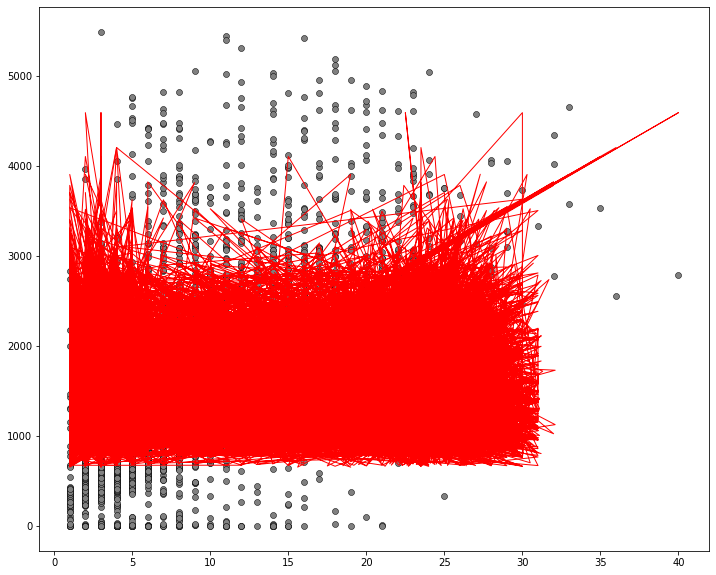

In [70]:
plt.scatter(X_test[:,0], y_test,  color='gray',
    linewidths=0.5,
    verts=None,
    edgecolors='black')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [0]:
from sklearn.metrics import explained_variance_score

In [0]:
print (explained_variance_score(y_test, y_pred))